In [1]:
import numpy as np
import matplotlib.pyplot as plt 

Text(0, 0.5, 'y')

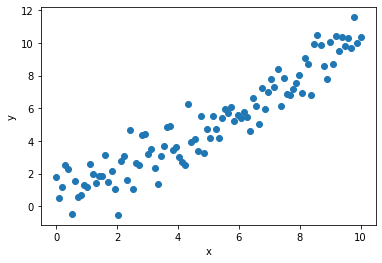

In [4]:
np.random.seed(0)

m = 100
X = np.linspace(0,10,m).reshape(m,1)
y = X + np.random.randn(m,1)
plt.scatter(X,y)
plt.xlabel('x')
plt.ylabel('y')

In [5]:
from sklearn.linear_model import LinearRegression

[[0.97026731]]


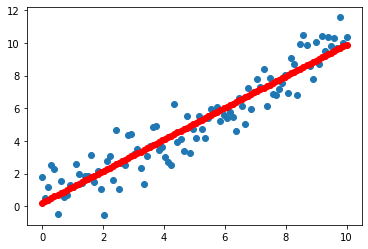

In [9]:
model = LinearRegression()
model.fit(X,y)
model.score(X,y)
y_predict = model.predict(X)

print(model.coef_)
plt.scatter(X,y)
plt.scatter(X,y_predict,c='r')

In [18]:
from sklearn.metrics import mean_absolute_error, make_scorer

mean_absolute_error(y,y_predict)

0.8051083770818453

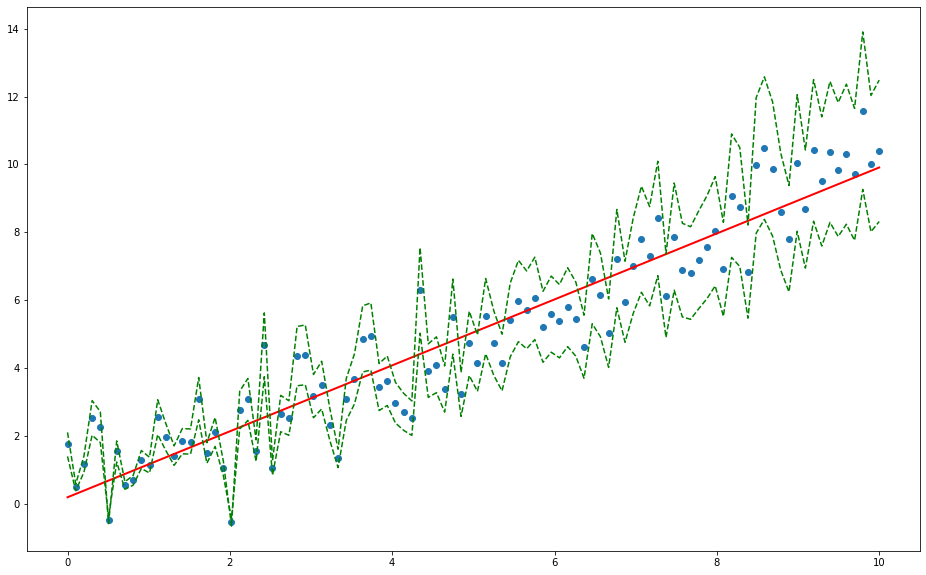

In [19]:
plt.figure(figsize=(16,10))
plt.scatter(X,y)
plt.plot(X, y_predict, c='r', lw=2)
plt.plot(X, 0.2*y+y, c='g', ls='--')
plt.plot(X, -0.2*y+y, c='g', ls='--')

## We want the prediction to be in the green range 

In [20]:
# custum_metric return the percentage of prediction points that
# are in the allowed range

def custom_metric(y, y_predict):
    return np.sum((y_predict < 0.2*y+y) & (y_predict > -0.2*y+y))/y.size

In [21]:
custom_scorer = make_scorer(custom_metric, greater_is_better=True)

In [26]:
from sklearn.model_selection import cross_val_score, GridSearchCV

cross_val_score(LinearRegression(), X, y, cv=3, scoring=custom_scorer)


array([0.11764706, 0.66666667, 0.66666667])

In [34]:
from sklearn.svm import SVR

model = SVR(kernel='rbf', degree=3)
params = {'gamma':np.arange(0.1,1,0.5)}

grid = GridSearchCV(model, param_grid=params, cv=3, scoring=custom_scorer)

grid.fit(X,y)
best_model = grid.best_estimator_

C:\Users\xueyu\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\xueyu\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\xueyu\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\xueyu\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

In [35]:
y_pred = best_model.predict(X)

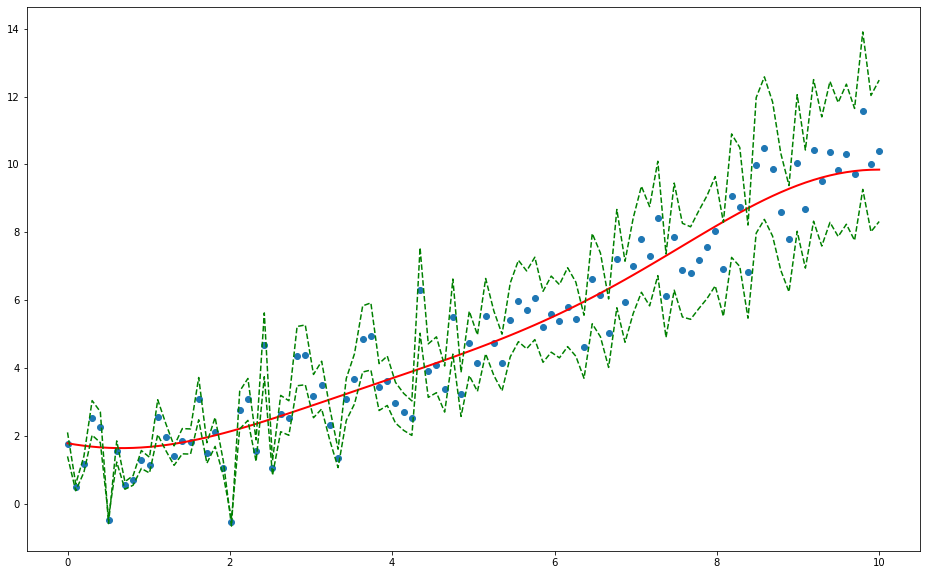

In [38]:
plt.figure(figsize=(16,10))
plt.scatter(X,y)
plt.plot(X, y_pred, c='r', lw=2)
plt.plot(X, 0.2*y+y, c='g', ls='--')
plt.plot(X, -0.2*y+y, c='g', ls='--')